In [1]:
import pandas as pd
import chess
import chess.pgn
import numpy as np
import os
import random
import matplotlib.pyplot as plt
from tqdm import tqdm
import sys

In [2]:
def fen_to_bitboard(fen):
    row, column = 0, 0
    bitboard = np.zeros((17, 8, 8))
    for c in fen:
        if c == " ":
            break
        elif c == "P":
            bitboard[0][row][column] = 1
            column += 1
        elif c == "p":
            bitboard[6][row][column] = 1
            column += 1
        elif c == "R":
            bitboard[1][row][column] = 1
            column += 1
        elif c == "r":
            bitboard[7][row][column] = 1
            column += 1
        elif c == "N":
            bitboard[2][row][column] = 1
            column += 1
        elif c == "n":
            bitboard[8][row][column] = 1
            column += 1
        elif c == "B":
            bitboard[3][row][column] = 1
            column += 1
        elif c == "b":
            bitboard[9][row][column] = 1
            column += 1
        elif c == "Q":
            bitboard[4][row][column] = 1
            column += 1
        elif c == "q":
            bitboard[10][row][column] = 1
            column += 1
        elif c == "K":
            bitboard[5][row][column] = 1
            column += 1
        elif c == "k":
            bitboard[11][row][column] = 1
            column += 1
        elif c == "/":
            row += 1
            column = 0
        elif c in "123456789":
            column += int(c)
    
    castle_rights = fen.split(" ")[2]
    for i in range(8):
        for j in range(8):
            bitboard[12][i][j] = int("K" in castle_rights)
    for i in range(8):
        for j in range(8):
            bitboard[13][i][j] = int("Q" in castle_rights)
    for i in range(8):
        for j in range(8):
            bitboard[14][i][j] = int("k" in castle_rights)
    for i in range(8):
        for j in range(8):
            bitboard[15][i][j] = int("q" in castle_rights)
    
    turn = fen.split(" ")[1]
    for i in range(8):
        for j in range(8):
            bitboard[16][i][j] = int(turn == "b")
        
    return bitboard

In [3]:
# Specify the directory path where you want to search for .zip files
folder_path = './gm/'

# Get a list of all files in the specified directory
files = os.listdir(folder_path)

# Use list comprehension to filter files with .zip extension
pgn_files = [file for file in files if file.endswith('.pgn')]

# Print the list of .zip files
print("List of .zip files in the folder:")
print(pgn_files)

List of .zip files in the folder:
['Shirov.pgn', 'Winawer.pgn', 'Lautier.pgn', 'Gulko.pgn', 'Yu.pgn', 'Bruzon.pgn', 'Tartakower.pgn', 'Tarrasch.pgn', 'Horwitz.pgn', 'Kamsky.pgn', 'Kramnik.pgn', 'Azmaiparashvili.pgn', 'Nimzowitsch.pgn', 'Nisipeanu.pgn', 'Harikrishna.pgn', 'Hort.pgn', 'TorreRepetto.pgn', 'Geller.pgn', 'Wojtaszek.pgn', 'Navara.pgn', 'Nakamura.pgn', 'Ni.pgn', 'Rubinstein.pgn', 'DeFirmian.pgn', 'Gligoric.pgn', 'Caruana.pgn', 'Serper.pgn', 'Janowski.pgn', 'Eljanov.pgn', 'Evans.pgn', 'Andreikin.pgn', 'Berliner.pgn', 'Miles.pgn', 'VanWely.pgn', 'Xie.pgn', 'Ivkov.pgn', 'Waitzkin.pgn', 'Le.pgn', 'Spassky.pgn', 'Zukertort.pgn', 'Kavalek.pgn', 'Wolff.pgn', 'Zhu.pgn', 'Ye.pgn', 'Bisguier.pgn', 'Soltis.pgn', 'Beliavsky.pgn', 'Speelman.pgn', 'Maroczy.pgn', 'IvanovA.pgn', 'Dreev.pgn', 'Olafsson.pgn', 'Najer.pgn', 'Rohde.pgn', 'Tiviakov.pgn', 'Muzychuk.pgn', 'Stahlberg.pgn', 'Wojtkiewicz.pgn', 'Vitiugov.pgn', 'Schlechter.pgn', 'Morozevich.pgn', 'SultanKhan.pgn', 'Timman.pgn', 'Xu.pgn',

In [5]:
# PGN -> Dictionary of FENs
# Only use when necessary
# Optimzied version by ChatGPT
fen_dict = {}
game_count = 0
player_names = ['Carlsen', 'Caruana', 'Ding', 'Nakamura', 'Firouzja', 'Nepomniachtchi', 'So', 'Giri', 
                'Karjakin', 'Rapport', 'Anand', 'Kramnik', 'Kasparov', 'Fischer', 'Aronian', 'Finegold',
               'Karpov']
duplicate_checker = set()

for player_name in tqdm(player_names):
    pgn = open(f"./gm/{player_name}.pgn")
    data = []
    counter = 0

    while True:
        try:
            game = chess.pgn.read_game(pgn)
        except:
            continue
            
        if game == None:
            break
        if str(game.headers) in duplicate_checker:
            continue
            
        duplicate_checker.add(str(game.headers))
        
        result_str = game.headers["Result"]
        result_dict = {"1-0": 1, "1/2-1/2": 0.5, "0-1": 0}
        if result_str not in result_dict.keys():
            continue
        results = result_dict[result_str]

        board = game.board()
        fen = board.fen()
        fen = " ".join(fen.split(' ')[:-3])

        if fen not in fen_dict:
            fen_dict[fen] = [0, 0, 0]
        fen_dict[fen][2 - int(results*2)] += 1

        for move in game.mainline_moves():
            board.push(move)
            fen = board.fen()
            fen = " ".join(fen.split(' ')[:-3])
            
            if fen not in fen_dict:
                fen_dict[fen] = [0, 0, 0]
            fen_dict[fen][2 - int(results*2)] += 1

100%|███████████████████████████████████████████| 17/17 [06:39<00:00, 23.49s/it]


In [6]:
fen_dict

{'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq': [17345, 19141, 12197],
 'rnbqkbnr/pppppppp/8/8/3P4/8/PPP1PPPP/RNBQKBNR b KQkq': [5407, 6924, 4209],
 'rnbqkb1r/pppppppp/5n2/8/3P4/8/PPP1PPPP/RNBQKBNR w KQkq': [3676, 4953, 2840],
 'rnbqkb1r/pppppppp/5n2/8/3P4/5N2/PPP1PPPP/RNBQKB1R b KQkq': [616, 651, 554],
 'rnbqkb1r/ppp1pppp/5n2/3p4/3P4/5N2/PPP1PPPP/RNBQKB1R w KQkq': [425, 597, 324],
 'rnbqkb1r/ppp1pppp/5n2/3p4/3P4/4PN2/PPP2PPP/RNBQKB1R b KQkq': [37, 28, 42],
 'rn1qkb1r/ppp1pppp/5n2/3p1b2/3P4/4PN2/PPP2PPP/RNBQKB1R w KQkq': [6, 2, 6],
 'rn1qkb1r/ppp1pppp/5n2/3p1b2/2PP4/4PN2/PP3PPP/RNBQKB1R b KQkq': [6, 2, 4],
 'rn1qkb1r/pp2pppp/2p2n2/3p1b2/2PP4/4PN2/PP3PPP/RNBQKB1R w KQkq': [80,
  113,
  55],
 'rn1qkb1r/pp2pppp/2p2n2/3p1b2/2PP4/2N1PN2/PP3PPP/R1BQKB1R b KQkq': [78,
  99,
  49],
 'rn1qkb1r/pp3ppp/2p1pn2/3p1b2/2PP4/2N1PN2/PP3PPP/R1BQKB1R w KQkq': [72,
  86,
  48],
 'rn1qkb1r/pp3ppp/2p1pn2/3p1b2/2PP4/2NBPN2/PP3PPP/R1BQK2R b KQkq': [0, 5, 3],
 'rn1qkb1r/pp3ppp/2p1pn2/3p4/2PP4/2NbPN2/PP3

In [7]:
len(fen_dict)

3468542

In [8]:
sys.getsizeof(fen_dict) / 1000000

123.033008

In [9]:
duplicate_checker

{"Headers(Event='VI World Blitz', Site='Moscow RUS', Date='2010.11.17', Round='18.3', White='Kramnik,V', Black='Andreikin,D', Result='1-0', WhiteElo='2791', BlackElo='2683', ECO='A15')",
 "Headers(Event='FIDE World Rapid 2014', Site='Dubai UAE', Date='2014.06.16', Round='4.8', White='Nakamura,Hi', Black='Fressinet,L', Result='1/2-1/2', WhiteElo='2775', BlackElo='2717', ECO='D00')",
 "Headers(Event='Corus A', Site='Wijk aan Zee NED', Date='2006.01.17', Round='4', White='Sokolov,Iv', Black='Anand,V', Result='1/2-1/2', WhiteElo='2689', BlackElo='2792', ECO='D28')",
 "Headers(Event='IX EICC', Site='Plovdiv BUL', Date='2008.04.26', Round='6', White='Savchenko,B', Black='Caruana,F', Result='0-1', WhiteElo='2569', BlackElo='2620', ECO='D30')",
 "Headers(Event='Katara Bullet Final 2021', Site='lichess.org INT', Date='2021.06.23', Round='2.5', White='Bortnyk,Olexandr', Black='Carlsen,M', Result='1/2-1/2', WhiteElo='2598', BlackElo='2847', ECO='C24')",
 "Headers(Event='GCT Blitz Paris 2019', Sit

In [10]:
len(duplicate_checker)

48696

In [11]:
sys.getsizeof(duplicate_checker) / 1000000

2.097368

In [12]:
data = []
counter = 0

for fen in tqdm(fen_dict):
    bitboard = fen_to_bitboard(fen)
    bitboard = bitboard.flatten()
    
    for bit in bitboard:
        if bit != 0 and bit != 1:
            continue
            
    label = (fen_dict[fen][0] - fen_dict[fen][2]) / sum(fen_dict[fen])
    entry = np.append(bitboard, label)
    has_nan = np.isnan(entry).any()
    has_inf = np.isinf(entry).any()
    
    if has_nan or has_inf:
        continue
        
    data.append(entry)
    
    if len(data) >= 1280:
        df = pd.DataFrame(data)
        df.to_csv(f"./gm/data_0/gm_{counter}.csv", encoding = 'utf-8', index=False)
        data = []
        counter += 1

100%|██████████████████████████████| 3468542/3468542 [1:14:34<00:00, 775.25it/s]


In [13]:
csvs = []
for csv in os.listdir("./gm/data_0/"):
    if ".csv" in csv:
        csvs.append(csv)
len(csvs)

2709

In [14]:
test_df = pd.read_csv('./gm/data_0/gm_0.csv')
test_df

,0,1,2,3,4,5,6,7,8,9,...,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.105745
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.072430
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.072892
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.034047
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.075037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000
1276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000
1278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [16]:
dfs = []
counter = 0

for i in tqdm(range(len(csvs))):
    try:
        temp_df = pd.read_csv("./gm/data_0/" + csvs[i])
    except:
        continue

    dfs.append(temp_df)

    if len(dfs) >= 100:
        df = pd.concat(dfs)
        column_names = df.columns.tolist()

        column_names[-1] = "result"

        df.columns = column_names

        df.to_csv(f'./gm/data_1/bitboard_{counter}.csv',encoding = 'utf-8', index = False)
        counter += 1
        dfs = []
df.to_csv(f'./gm/data_1/bitboard_{counter}.csv', index = False)

100%|███████████████████████████████████████| 2709/2709 [48:07<00:00,  1.07s/it]


In [17]:
test_df = pd.read_csv('./gm/data_1/bitboard_0.csv')
test_df

,0,1,2,3,4,5,6,7,8,9,...,1079,1080,1081,1082,1083,1084,1085,1086,1087,result
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
127996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
127997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
127998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
positions = [[test_df[str(col)].mean() for col in range(64*i, 64*(i+1))] for i in range(12)]

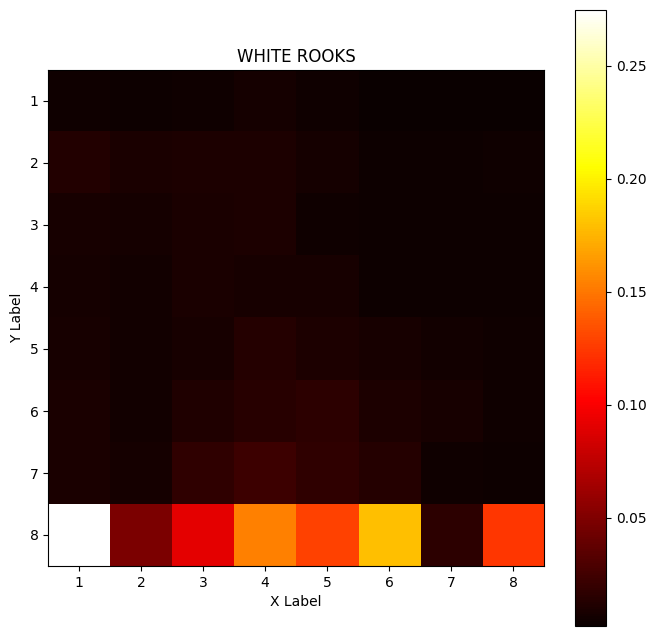

In [19]:
piece_dict = {
    0: "WHITE PAWNS",
    1: "WHITE ROOKS",
    2: "WHITE KNIGHTS",
    3: "WHITE BISHOPS",
    4: "WHTIE QUEEN",
    5: "WHITE KING",
    6: "BLACK PAWNS",
    7: "BLACK ROOKS",
    8: "BLACK KNIGTHS",
    9: "BLACK BISHOPS",
    10: "BLACK QUEEN",
    11: "BLACK KING"
}

piece_index = 1

plt.figure(figsize=(8, 8))
plt.imshow(np.array(positions[piece_index]).reshape(8,8), cmap='hot', interpolation='nearest')

# Customize the heatmap
plt.colorbar()
plt.title(piece_dict[piece_index])
plt.xticks(np.arange(8), np.arange(1, 9))  # Set X-axis labels from 1 to 8
plt.yticks(np.arange(8), np.arange(1, 9))  # Set Y-axis labels from 1 to 8
plt.xlabel('X Label')
plt.ylabel('Y Label')

# Display the heatmap
plt.show()